In [241]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as rq
import random as rnd
import json
import time

# Import API key
import config

# Import citypy to gather city locations
from citipy import citipy
from pprint import pprint

In [242]:
city_list = []
weather_api = config.weather_api
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api

city_columns = ['City','City Latitude','City Longitude','Max Temperature','Humidity','Cloud Coverage','Wind Speed','City Country','City DateTime']
cnt = 1
new_df = pd.DataFrame()

In [244]:
#for x in range(600):
while len(city_list) < 500:
    lat_value = round(rnd.uniform(-90, 90),2)
    long_value = round(rnd.uniform(-180, 180),2)
    city = citipy.nearest_city(lat_value,long_value)
    if city.city_name not in city_list:
        city_list.append(city.city_name)

In [246]:
print("Beginning Data Retrieval")
print("-------------------------------")
for city in city_list:
    try:
        response = rq.get(f'{url}&q={city}').json()
        city_date = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(response["dt"]))
        data = response['name'],response['coord']['lat'],response['coord']['lon'],response["main"]["temp_max"],response["main"]["humidity"],response["clouds"]["all"],response["wind"]["speed"],response["sys"]["country"],city_date
        new_df = new_df.append([data],ignore_index = True)
        print(f'Processing Record {cnt} for {city} city')
        cnt += 1

        time.sleep(2)
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 for hilo city
Processing Record 2 for la ronge city
Processing Record 3 for te anau city
Processing Record 4 for kodiak city
Processing Record 5 for halifax city
City not found. Skipping...
Processing Record 6 for butaritari city
Processing Record 7 for ushuaia city
Processing Record 8 for port alfred city
Processing Record 9 for barrow city
Processing Record 10 for namibe city
Processing Record 11 for albany city
Processing Record 12 for ampanihy city
Processing Record 13 for bemidji city
Processing Record 14 for busselton city
Processing Record 15 for cape town city
Processing Record 16 for faanui city
Processing Record 17 for tomohon city
Processing Record 18 for jamestown city
Processing Record 19 for thompson city
Processing Record 20 for auki city
Processing Record 21 for vila franca do campo city
Processing Record 22 for lerik city
Processing Record 23 for katobu city
Processing Record 24 for yamada cit

In [247]:
#new_df = pd.DataFrame([data],columns=city_columns)
new_df.columns = city_columns
new_df

,City,City Latitude,City Longitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed,City Country,City DateTime
0,Hilo,19.73,-155.09,82.40,69,75,5.82,US,2020-11-11 18:03:21
1,La Ronge,55.10,-105.28,3.20,64,100,6.93,CA,2020-11-11 18:03:05
2,Te Anau,-45.42,167.72,69.62,37,72,4.92,NZ,2020-11-11 18:05:08
3,Saint Paul Harbor,57.79,-152.41,44.60,70,40,6.93,US,2020-11-11 18:05:10
4,Halifax,44.65,-63.57,60.01,93,82,16.11,CA,2020-11-11 18:03:24
...,...,...,...,...,...,...,...,...,...
446,Vao,-22.67,167.48,72.21,84,48,19.35,NC,2020-11-11 18:22:00
447,Belmonte,-15.86,-38.88,77.00,73,0,6.93,BR,2020-11-11 18:22:03
448,Simpang,-1.27,104.08,78.22,90,100,1.83,ID,2020-11-11 18:22:05
449,Minas de Barroterán,27.63,-101.28,72.45,63,10,6.08,MX,2020-11-11 18:22:07


In [250]:
new_df.describe()

,City Latitude,City Longitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000
mean,19.038758,16.574922,57.388958,75.474501,50.929047,8.373016
std,33.791739,93.032022,23.280606,17.882236,38.861856,5.842159
min,-54.800000,-175.200000,-19.660000,12.000000,0.000000,0.220000
25%,-9.565000,-63.585000,41.000000,67.000000,6.000000,4.420000
50%,22.570000,22.930000,64.400000,79.000000,55.000000,6.930000
75%,46.475000,101.245000,76.695000,89.000000,90.000000,11.410000
max,78.220000,179.320000,89.600000,100.000000,100.000000,39.150000


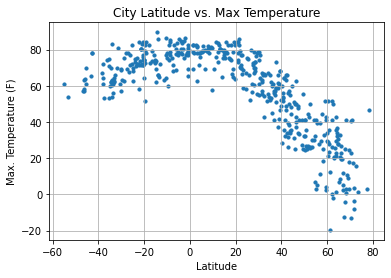

In [251]:
# Build a scatter plot for each data type
plt.scatter(new_df["City Latitude"], new_df["Max Temperature"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

In [240]:
%reset